In [1]:
import pandas
import numpy
import itertools
from functools import reduce
import re

zones_ds = pandas.read_csv('zones.csv')
zones = zones_ds['zone_id']

In [2]:
# CamelCase to snake_case
def convert(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [3]:
def load_ds_for_zones(filename,col_name):
    df = pandas.read_csv(filename)
    df.set_index('col/row',inplace=True, drop=True)

    # Filter rows
    df = df[df.index.isin(zones)]
    # Filter columns
    df = df[list(map(lambda zone : str(zone), zones.values))]
    
    # Transform it into a table
    df = df.stack()
    df = df.reset_index()
    df.columns = ['orig_id','dest_id',col_name]
    df
    return df

In [4]:
def load_files(filenames):
    dfs = []
    for file in filenames:
        name = convert(file.split('.')[0])
        print('loading ' + name)
        dfs.append(load_ds_for_zones('data/'+file,name))
    return dfs

In [5]:
files = ['AuxTimeOffpeak.csv','CarDemandWork.csv','FirstWaitTimePeak.csv','TotWaitTimeOffpeak.csv','WalkDemandOther.csv',
         'AuxTimePeak.csv','CarDistance.csv','InvehicleTimeOffpeak.csv','TotWaitTimePeak.csv','WalkDemandWork.csv',
         'BicycleDemandOther.csv','CarTimeOffPeak.csv','InvehicleTimePeak.csv','TransitDemandBusiness.csv',
         'CarDemandBusiness.csv','CarTimePeak.csv','NBoardingsOffpeak.csv','TransitDemandOther.csv',
         'CarDemandOther.csv','FirstWaitTimeOffpeak.csv','NBoardingsPeak.csv','TransitDemandWork.csv']

dfs = load_files(files)

loading aux_time_offpeak


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,25

loading car_demand_work
loading first_wait_time_peak
loading tot_wait_time_offpeak
loading walk_demand_other
loading aux_time_peak
loading car_distance
loading invehicle_time_offpeak
loading tot_wait_time_peak
loading walk_demand_work
loading bicycle_demand_other
loading car_time_off_peak
loading invehicle_time_peak
loading transit_demand_business
loading car_demand_business
loading car_time_peak
loading n_boardings_offpeak
loading transit_demand_other
loading car_demand_other
loading first_wait_time_offpeak
loading n_boardings_peak
loading transit_demand_work


In [6]:
table = reduce(lambda left,right: pandas.merge(left,right),dfs)

In [8]:
table.head()

orig_id dest_id aux_time_offpeak  car_demand_work first_wait_time_peak  \
0   710201  718828               15         0.000022              .833333   
1   710201  718831        10.800001         0.000037              .833333   
2   710201  718830               12         0.000019              .833333   
3   710201  718832             13.2         0.000022              .833333   
4   710201  718834        36.479999         0.000020              .833333   

  tot_wait_time_offpeak  walk_demand_other aux_time_peak  car_distance  \
0                  53.7                0.0            15     127.64214   
1             68.986671                0.0     10.800001     106.55214   
2             42.313335                0.0            12     103.53214   
3             85.966667                0.0          13.2     117.67214   
4                  53.7                0.0     36.479999     112.55214   

  invehicle_time_offpeak         ...          invehicle_time_peak  \
0              150.31999         ...                       150.05   
1              133.80999         ...                    137.05999   
2                  123.1         ...                       124.74   
3              140.22999         ...                    143.30999   
4                 126.82         ...                       126.55   

   transit_demand_business  car_demand_business  car_time_peak  \
0                      0.0                  0.0     112.996000   
1                      0.0                  0.0      92.583648   
2                      0.0                  0.0      90.241851   
3                      0.0                  0.0     104.014180   
4                      0.0                  0.0     101.937590   

  n_boardings_offpeak  transit_demand_other  car_demand_other  \
0                4.45                   0.0               0.0   
1                4.94                   0.0               0.0   
2                3.94                   0.0               0.0   
3                4.94                   0.0               0.0   
4                4.45                   0.0               0.0   

   first_wait_time_offpeak n_boardings_peak  transit_demand_work  
0                 1.367851             4.49             0.000132  
1                 1.367851             4.98             0.000043  
2                 1.367851             3.98             0.000044  
3                 1.367851             4.98             0.000031  
4                 1.367851             4.49             0.000047  

[5 rows x 24 columns]

In [9]:
table.to_csv('table.csv',index=False)

In [26]:
table.dtypes

orig_id                      int64
dest_id                     object
aux_time_offpeak            object
car_demand_work            float64
first_wait_time_peak        object
tot_wait_time_offpeak       object
walk_demand_other          float64
aux_time_peak               object
car_distance               float64
invehicle_time_offpeak      object
tot_wait_time_peak          object
walk_demand_work           float64
bicycle_demand_other       float64
car_time_off_peak          float64
invehicle_time_peak         object
transit_demand_business    float64
car_demand_business        float64
car_time_peak              float64
n_boardings_offpeak         object
transit_demand_other       float64
car_demand_other           float64
first_wait_time_offpeak     object
n_boardings_peak            object
transit_demand_work        float64
dtype: object

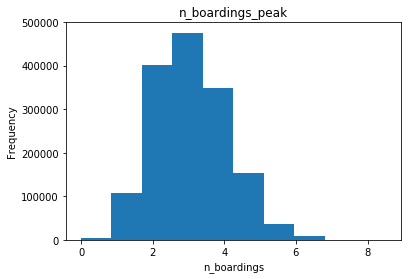

In [14]:
boardings_peak = table['n_boardings_peak'].astype(float)
plt = boardings_peak.plot.hist(bins=10,title="n_boardings_peak");
plt.set_xlabel('n_boardings');

Text(0.5,0,'dist (km)')

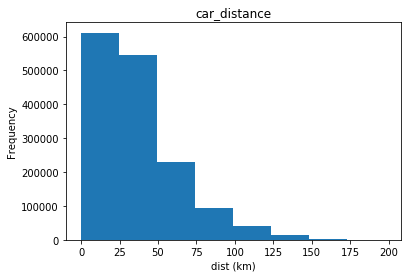

In [16]:
plt = table['car_distance'].plot.hist(bins=8,title='car_distance');
plt.set_xlabel('dist (km)')

Text(0.5,0,'time (min)')

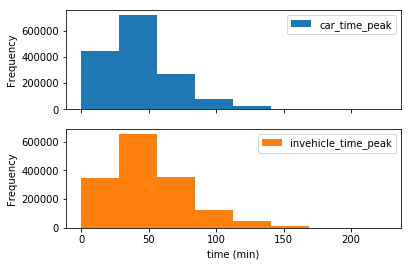

In [40]:
plt = table[['car_time_peak','invehicle_time_peak']].astype(float).plot.hist(bins=8,subplots=True);
plt[0].set_xlabel('time (min)')
plt[1].set_xlabel('time (min)')

Text(0.5,0,'trips > 50')

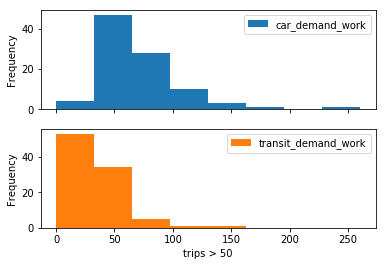

In [36]:
plt = table[['car_demand_work','transit_demand_work']][(table['car_demand_work']>50) | (table['transit_demand_work']>50)].plot.hist(bins=8,subplots=True)
plt[0].set_xlabel('trips > 50')
plt[1].set_xlabel('trips > 50')